**R AKSHAY MADHAVRAJ**
**19BCE1844**

## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import regularizers
import xgboost as xgb
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn.preprocessing import RobustScaler
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')
%matplotlib inline 

## Exploring the dataset

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /gdrive

Mounted at /content/gdrive
[Errno 2] No such file or directory: '/gdrive'
/content


In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
nRowsRead = None

df1 = pd.read_csv("/content/gdrive/MyDrive/Datasets/CICIDS17/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv")
df2=pd.read_csv("/content/gdrive/MyDrive/Datasets/CICIDS17/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv")
df3=pd.read_csv("/content/gdrive/MyDrive/Datasets/CICIDS17/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv")
df4=pd.read_csv("/content/gdrive/MyDrive/Datasets/CICIDS17/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv")
df5=pd.read_csv("/content/gdrive/MyDrive/Datasets/CICIDS17/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv")
df6=pd.read_csv("/content/gdrive/MyDrive/Datasets/CICIDS17/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv")
df7=pd.read_csv("/content/gdrive/MyDrive/Datasets/CICIDS17/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv")
df8=pd.read_csv("/content/gdrive/MyDrive/Datasets/CICIDS17/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv")


data_train = pd.concat([df1,df2])
del df1,df2
data_train = pd.concat([data_train,df3])
del df3
df = pd.concat([data_train,df4])
del df4
df = pd.concat([data_train,df5])
del df5
df = pd.concat([data_train,df6])
del df6
df = pd.concat([data_train,df7])
del df7
df = pd.concat([data_train,df8])
del df8

nRow, nCol = data_train.shape
print(f' table has{nRow} rows and {nCol} columns')

 table has703245 rows and 79 columns


In [4]:
data_train.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [5]:
# Packet Attack Distribution
data_train[' Label'].value_counts()

BENIGN      414322
PortScan    158930
DDoS        128027
Bot           1966
Name:  Label, dtype: int64

In [6]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 703245 entries, 0 to 191032
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             703245 non-null  int64  
 1    Flow Duration                703245 non-null  int64  
 2    Total Fwd Packets            703245 non-null  int64  
 3    Total Backward Packets       703245 non-null  int64  
 4   Total Length of Fwd Packets   703245 non-null  int64  
 5    Total Length of Bwd Packets  703245 non-null  int64  
 6    Fwd Packet Length Max        703245 non-null  int64  
 7    Fwd Packet Length Min        703245 non-null  int64  
 8    Fwd Packet Length Mean       703245 non-null  float64
 9    Fwd Packet Length Std        703245 non-null  float64
 10  Bwd Packet Length Max         703245 non-null  int64  
 11   Bwd Packet Length Min        703245 non-null  int64  
 12   Bwd Packet Length Mean       703245 non-nul

In [7]:
data_train.describe().style.background_gradient(cmap='Blues').set_properties(**{'font-family':'Segoe UI'})

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703198.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000,703245.000000
mean,7962.735034,10568220.332447,6.735627,7.360662,559.623447,10726.958693,253.342164,19.658897,76.835304,92.638353,1061.408849,32.798464,362.271855,450.316512,inf,inf,908835.340512,2096191.379292,6322294.593756,45356.800823,10169554.216974,1711846.707724,2189079.134422,6103958.489381,629920.466021,6960247.944129,1187668.392214,909182.261525,3112174.646564,668053.752978,0.033061,0.000000,0.000000,0.000000,161.366669,171.084133,33811.109268,10638.498187,13.003157,1239.469221,213.167419,409.247593,930452.873934,0.007916,0.033061,0.000137,0.443433,0.283570,0.090391,0.000000,0.000137,0.857279,239.499073,76.835304,362.271855,161.366669,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.735627,559.623447,7.360662,10728.362171,7570.834975,1243.481559,4.571550,25.690055,96568.836352,28123.037312,148358.005468,81046.132597,5030473.267738,1231938.516437,5904586.674563,4132827.877450
std,17263.042486,28150506.567439,572.363391,771.589746,4685.555384,1728003.232936,1132.537365,96.648907,303.048257,473.159672,2459.757593,63.942357,757.464203,1135.086387,nan,nan,3050189.684310,6169961.297416,18617379.958924,1328392.950912,28055187.999866,7444102.061711,7006787.997647,18915440.517685,6786680.999282,24127553.653176,7226711.486033,3972193.629123,12917586.656881,6949728.128887,0.178796,0.000000,0.000000,0.000000,12072.661993,15514.586358,162928.079691,45836.375702,22.003059,2633.357972,396.314924,873.551541,2665493.545653,0.088620,0.178796,0.011683,0.496790,0.450731,0.286741,0.000000,0.011683,0.908661,440.557691,303.048257,757.464203,12072.661993,0.000000,0.000000,0.000000,0.000000,0

## Preprocessing the data

In [8]:
data_train.columns = data_train.columns.str.strip()

In [9]:
df=data_train.copy()

In [10]:
df.loc[data_train['Label'] == "BENIGN" , "Label"] = "benign"
df.loc[data_train['Label'] != 'BENIGN' , "Label"] = "attack"

In [11]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,benign
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,benign
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,benign
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,0,0,0,0,0,0,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,benign
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,0,0,0,0,0,0,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,benign


In [12]:
def pie_plot(df, col):
    df[col].value_counts().plot(kind='pie', figsize=(15, 15), fontsize=20, autopct='%1.0f%%')
    plt.show()

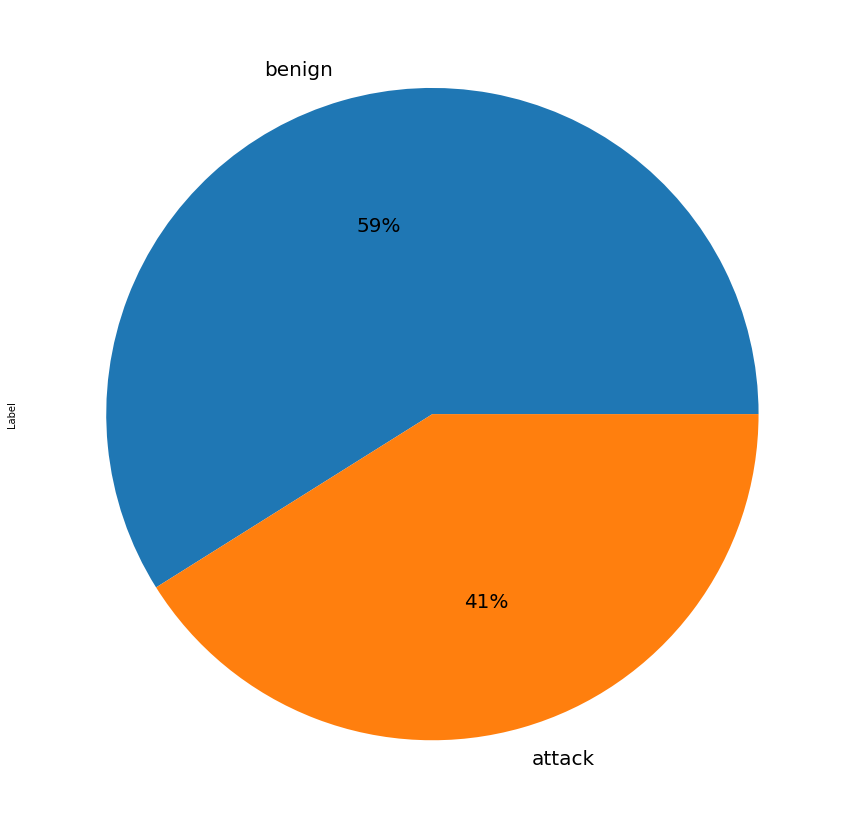

In [13]:
pie_plot(df,'Label')

In [14]:
for i in df.columns:
    df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)
df[['Flow Bytes/s', 'Flow Packets/s']] = df[['Flow Bytes/s', 'Flow Packets/s']].apply(pd.to_numeric)

In [15]:
print(df['Bwd PSH Flags'].value_counts())
print(df['Bwd URG Flags'].value_counts())
print(df['Fwd Avg Bytes/Bulk'].value_counts())
print(df['Fwd Avg Packets/Bulk'].value_counts())
print(df['Fwd Avg Bulk Rate'].value_counts())
print(df['Bwd Avg Bytes/Bulk'].value_counts())
print(df['Bwd Avg Packets/Bulk'].value_counts())
print(df['Bwd Avg Bulk Rate'].value_counts())

df.drop(['Bwd PSH Flags'], axis=1, inplace=True)
df.drop(['Bwd URG Flags'], axis=1, inplace=True)
df.drop(['Fwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop(['Fwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop(['Fwd Avg Bulk Rate'], axis=1, inplace=True)
df.drop(['Bwd Avg Bytes/Bulk'], axis=1, inplace=True)
df.drop(['Bwd Avg Packets/Bulk'], axis=1, inplace=True)
df.drop(['Bwd Avg Bulk Rate'], axis=1, inplace=True)

df.info()
df.head()

0    702718
Name: Bwd PSH Flags, dtype: int64
0    702718
Name: Bwd URG Flags, dtype: int64
0    702718
Name: Fwd Avg Bytes/Bulk, dtype: int64
0    702718
Name: Fwd Avg Packets/Bulk, dtype: int64
0    702718
Name: Fwd Avg Bulk Rate, dtype: int64
0    702718
Name: Bwd Avg Bytes/Bulk, dtype: int64
0    702718
Name: Bwd Avg Packets/Bulk, dtype: int64
0    702718
Name: Bwd Avg Bulk Rate, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 702718 entries, 0 to 191032
Data columns (total 71 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Destination Port             702718 non-null  int64  
 1   Flow Duration                702718 non-null  int64  
 2   Total Fwd Packets            702718 non-null  int64  
 3   Total Backward Packets       702718 non-null  int64  
 4   Total Length of Fwd Packets  702718 non-null  int64  
 5   Total Length of Bwd Packets  702718 non-null  int64  
 6   Fwd Packet L

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,2,12,0,0,33,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,benign
1,55054,109,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,1.100917e+05,18348.62385,109.0,0.0,109,109,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,20,20,9174.311927,9174.311927,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,benign
2,55055,52,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,2.307692e+05,38461.53846,52.0,0.0,52,52,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,20,20,19230.769230,19230.769230,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,1,6,1,6,29,256,0,20,0.0,0.0,0,0,0.0,0.0,0,0,benign
3,46236,34,1,1,6,6,6,6,6.0,0.0,6,6,6.0,0.0,3.529412e+05,58823.52941,34.0,0.0,34,34,0,0.0,0.0,0,0,0,0.0,0.0,0,0,0,0,20,20,29411.764710,29411.764710,6,6,6.0,0.0,0.0,0,0,0,0,1,1,0,0,1,9.0,6.0,6.0,20,1,6,1,6,31,329,0,20,0.0,0.0,0,0,0.0,0.0,0,0,benign
4,54863,3,2,0,12,0,6,6,6.0,0.0,0,0,0.0,0.0,4.000000e+06,666666.66670,3.0,0.0,3,3,3,3.0,0.0,3,3,0,0.0,0.0,0,0,0,0,40,0,666666.666700,0.000000,6,6,6.0,0.0,0.0,0,0,0,0,1,0,0,0,0,9.0,6.0,0.0,40,2,12,0,0,32,-1,1,20,0.0,0.0,0,0,0.0,0.0,0,0,benign


In [16]:
from sklearn.model_selection import train_test_split
train, test=train_test_split(df,test_size=0.3, random_state=10)

#Exploratory Analysis
# Descriptive statistics
train.describe()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Fwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min
count,491902.000000,4.919020e+05,491902.000000,491902.000000,4.919020e+05,4.919020e+05,491902.000000,491902.000000,491902.000000,491902.000000,491902.00000,491902.000000,491902.000000,491902.000000,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,491902.000000,491902.0,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,491902.000000,491902.000000,491902.000000,491902.000000,4.919020e+05,491902.000000,491902.000000,491902.000000,491902.000000,491902.000000,491902.000000,491902.0,491902.000000,491902.000000,491902.000000,491902.000000,491902.000000,4.919020e+05,491902.000000,4.919020e+05,491902.000000,4.919020e+05,491902.000000,491902.000000,491902.000000,491902.000000,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05,4.919020e+05
mean,7943.088186,1.058715e+07,6.786327,7.440488,5.613307e+02,1.069467e+04,252.517520,19.668387,76.586188,92.291834,1063.11569,32.836000,362.635529,450.958913,1.153043e+06,4.454770e+04,9.098762e+05,2.098602e+06,6.320437e+06,4.408477e+04,1.018604e+07,1.714841e+06,2.186858e+06,6.099701e+06,6.324056e+05,6.986459e+06,1.194429e+06,9.102939e+05,3.116635e+06,6.724147e+05,0.033078,0.0,1.632407e+02,1.734490e+02,3.404419e+04,1.064477e+04,13.010795,1240.432413,213.304478,409.512532,9.316517e+05,0.007762,0.033078,0.000138,0.443229,0.283573,0.090235,0.0,0.000138,0.857559,239.666532,76.586188,362.635529,1.632407e+02,6.786327,5.613307e+02,7.440488,1.069628e+04,7572.646743,1239.296185,4.571010,25.686027,9.594251e+04,2.775149e+04,1.472098e+05,8.072042e+04,5.027221e+06,1.230910e+06,5.900522e+06,4.129871e+06
std,17241.483401,2.818647e+07,568.637094,772.125583,4.749183e+03,1.670831e+06,1130.770389,96.715447,302.211655,472.210482,2462.35372,64.118951,757.799177,1136.294530,2.359201e+07,1.808412e+05,3.042042e+06,6.184182e+06,1.861293e+07,1.279338e+06,2.809065e+07,7.470397e+06,7.002709e+06,1.890671e+07,6.813193e+06,2.418307e+07,7.265739e+06,3.977322e+06,1.293158e+07,6.985980e+06,0.178840,0.0,1.207369e+04,1.555178e+04,1.636597e+05,4.595188e+04,21.897013,2635.273550,396.506990,874.113142,2.669159e+06,0.087758,0.178840,0.011757,0.496767,0.450732,0.286519,0.0,0.011757,0.915207,440.805357,302.211655,757.799177,1.207369e+04,568.637094,4.749183e+03,772.125583,1.671232e+06,12855.358391,6883.298119,539.080438,7.285799,7.230869e+05,3.066427e+05,9.716797e+05,6.782043e+05,1.582003e+07,7.532658e+06,1.853439e+07,1.462714e+07
min,0.000000,-1.300000e+01,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,-1.200000e+07,-2.000000e+06,-1.300000e+01,0.000000e+00,-1.300000e+01,-1.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-1.2000

In [17]:
# Packet Attack Distribution
train['Label'].value_counts()

benign    289924
attack    201978
Name: Label, dtype: int64

In [18]:
test['Label'].value_counts()

benign    124009
attack     86807
Name: Label, dtype: int64

In [19]:
from sklearn.preprocessing import StandardScaler
#Standard scaling
scaler = StandardScaler()
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))
sc_traindf = pd.DataFrame(train, columns = cols)
sc_testdf = pd.DataFrame(test, columns = cols)

In [20]:
from sklearn.preprocessing import OneHotEncoder 

# creating one hot encoder object 
onehotencoder = OneHotEncoder() 

trainDep = train['Label'].values.reshape(-1,1)
trainDep = onehotencoder.fit_transform(trainDep).toarray()
testDep = test['Label'].values.reshape(-1,1)
testDep = onehotencoder.fit_transform(testDep).toarray()

In [21]:
train_X=sc_traindf
train_y=trainDep[:,0]

test_X=sc_testdf
test_y=testDep[:,0]

In [22]:
from imblearn.over_sampling import SMOTE
over_sampler = SMOTE(k_neighbors=2)
X_res, y_res = over_sampler.fit_resample(train_X, train_y)

In [23]:
from collections import Counter
print(f"Training target statistics: {Counter(y_res)}")
print(f"Testing target statistics: {Counter(test_y)}")

Training target statistics: Counter({0.0: 289924, 1.0: 289924})
Testing target statistics: Counter({0.0: 124009, 1.0: 86807})


**Fitting Models**

In [48]:
from sklearn.svm import SVC 
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import BernoulliNB 
from xgboost import XGBClassifier
import imblearn
import time


# Train Gaussian Naive Baye Model
t1=time.time()
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_res, y_res)
t2=time.time()
print("Training time for BernoulliNB: ", t2-t1)
print()

# Train Decision Tree Model
t1=time.time()
DTC_Classifier = tree.DecisionTreeClassifier(criterion='gini',max_depth=2)
DTC_Classifier.fit(X_res, y_res)
t2=time.time()
print("Training time for Decision Tree: ", t2-t1)
print()

# Train XGBoost Model
t1=time.time()
XGB_Classifier = XGBClassifier(base_score=0.3, n_estimators=42)
XGB_Classifier.fit(X_res, y_res)
t2=time.time()
print("Training time for XGBoost: ", t2-t1)
print()

# Train Random Forest Model
t1=time.time()
RandomForest_Classifier = RandomForestClassifier(n_estimators=2)
RandomForest_Classifier.fit(X_res, y_res)
t2=time.time()
print("Training time for Random Forest: ", t2-t1)
print()

Training time for BernoulliNB:  0.8048233985900879

Training time for Decision Tree:  5.630455255508423

Training time for XGBoost:  112.2957022190094

Training time for Random Forest:  3.8919107913970947



**Evaluating Models**

In [49]:
from sklearn import metrics
from sklearn.metrics import f1_score


models = []
models.append(('Random Forest Classifier', RandomForest_Classifier))
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('XG Boost Classifier', XGB_Classifier))


for i, v in models:
    scores = cross_val_score(v, test_X, test_y, cv=10)
    accuracy = metrics.accuracy_score(test_y, v.predict(test_X))
    confusion_matrix = metrics.confusion_matrix(test_y, v.predict(test_X))
    classification = metrics.classification_report(test_y, v.predict(test_X), digits=8)
    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification) 
    print()


============================== Random Forest Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.9982686307858828

Model Accuracy:
 0.998586445051609

Confusion matrix:
 [[123941     68]
 [   230  86577]]

Classification report:
               precision    recall  f1-score   support

         0.0  0.99814772 0.99945165 0.99879926    124009
         1.0  0.99921519 0.99735044 0.99828195     86807

    accuracy                      0.99858645    210816
   macro avg  0.99868145 0.99840105 0.99854060    210816
weighted avg  0.99858727 0.99858645 0.99858625    210816



============================== Naive Bayes Classifier Model Evaluation ==============================

Cross Validation Mean Score:
 0.8024153643199163

Model Accuracy:
 0.8008120825743776

Confusion matrix:
 [[121078   2931]
 [ 39061  47746]]

Classification report:
               precision    recall  f1-score   support

         0.0  0.75608065 0.97636462 0.85221786    124009
      

In [50]:
def genPredRow(y_actual, y_pred):
    FP = []

    for i in range(len(y_pred)): 
        if y_pred[i]=='0.' and y_actual.iat[i]!=y_pred[i]:
          FP.append(1)
        elif y_pred[i]=='1.' and y_actual.iat[i]!=y_pred[i]:
          FP.append(1) 
        else:
          FP.append(0)
    return (pd.Series(FP))

In [51]:
# Define the classifiers

t1=time.time()
# Add the classifiers to a list
models = []
models.append(('XG Boost Classifier', XGB_Classifier))
models.append(('Random Forest Classifier', RandomForest_Classifier))




# Use Random Forest to generate new features
X_test_XGB_RF = test_X
Y_test_XGB_RF = test_y
X_train_XGB_RF = X_res
Y_train_XGB_RF = y_res
finalPred= genPredRow(Y_train_XGB_RF, models[1][1].predict(X_train_XGB_RF))
print("Size of number of FP:", finalPred.size)
finalPredTest = genPredRow(Y_test_XGB_RF, models[1][1].predict(X_test_XGB_RF))

Size of number of FP: 579848


In [52]:
X_train_XGB_RF = (finalPred.to_numpy()).reshape(-1,1)
X_test_XGB_RF = (finalPredTest.to_numpy()).reshape(-1,1)
print(X_train_XGB_RF.shape)
print(X_test_XGB_RF.shape)
print(X_res.shape)


(579848, 1)
(210816, 1)
(579848, 70)


In [53]:
# Train XGBoost on the new features
XGB_Classifier_RF = XGBClassifier(base_score=0.3, n_estimators=5, random_state=42)
XGB_Classifier_RF.fit(X_res, y_res)

t2=time.time()
print("Training Time for Random Forest with XG BOOST: ", t2-t1)

Training Time for Random Forest with XG BOOST:  19.19688868522644


In [54]:
t1=time.time()
Y_test_XGB_RF_pred = XGB_Classifier_RF.predict(test_X)
t2=time.time()
print ("Prediction Time for Random Forest with XG BOOST: ", t2-t1)
print()
scores_XGB_RF = cross_val_score(XGB_Classifier_RF, test_X, Y_test_XGB_RF_pred, cv=10)
accuracy_XGB_RF = metrics.accuracy_score(test_y, Y_test_XGB_RF_pred)
confusion_matrix_XGB_RF = metrics.confusion_matrix(test_y,Y_test_XGB_RF_pred)
classification_XGB_RF = metrics.classification_report(test_y,Y_test_XGB_RF_pred, digits=8)
print()
print('============================== {} Model Evaluation =============================='.format('Random Forest + XG Boost'))
print()
print ("Cross Validation Mean Score:" "\n", scores_XGB_RF.mean())
print()
print ("Model Accuracy:" "\n", accuracy_XGB_RF)
print()
print("Confusion matrix:" "\n", confusion_matrix_XGB_RF)
print()
print("Classification report:" "\n", classification_XGB_RF) 
print()

Prediction Time for Random Forest with XG BOOST:  0.14679241180419922


============================== Random Forest + XG Boost Model Evaluation ==============================

Cross Validation Mean Score:
 0.9996537265171884

Model Accuracy:
 0.9979365892531876

Confusion matrix:
 [[123883    126]
 [   309  86498]]

Classification report:
               precision    recall  f1-score   support

         0.0  0.99751192 0.99898394 0.99824739    124009
         1.0  0.99854544 0.99644038 0.99749180     86807

    accuracy                      0.99793659    210816
   macro avg  0.99802868 0.99771216 0.99786959    210816
weighted avg  0.99793749 0.99793659 0.99793626    210816




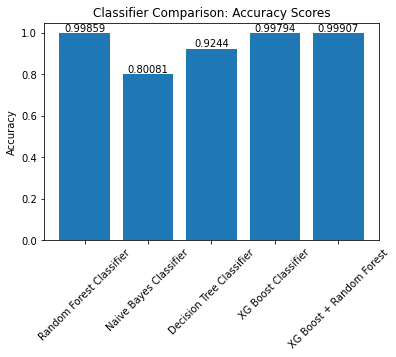

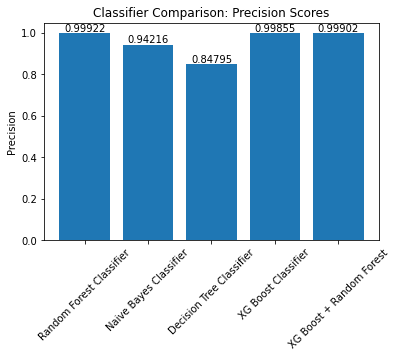

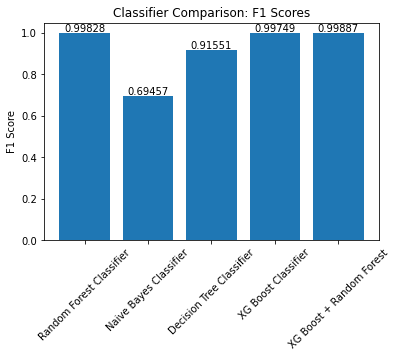

In [55]:
import matplotlib.pyplot as plt
from sklearn import metrics

models = []
models.append(('Random Forest Classifier', RandomForest_Classifier))
models.append(('Naive Bayes Classifier', BNB_Classifier))
models.append(('Decision Tree Classifier', DTC_Classifier))
models.append(('XG Boost Classifier', XGB_Classifier_RF))
models.append(('XG Boost + Random Forest', XGB_Classifier))

# Define lists to store scores for each model
accuracy_scores = []
precision_scores = []
f1_scores = []

for i, v in models:
    # Calculate scores for each model
    accuracy = round(metrics.accuracy_score(test_y, v.predict(test_X)), 5)
    precision = round(metrics.precision_score(test_y, v.predict(test_X)), 5)
    f1 = round(metrics.f1_score(test_y, v.predict(test_X)), 5)
    
    # Append scores to the lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    f1_scores.append(f1)

# Create bar chart for accuracy scores
fig, ax = plt.subplots()
rects = ax.bar(np.arange(len(models)), accuracy_scores)
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels([model[0] for model in models], rotation=45)
ax.set_ylabel('Accuracy')
ax.set_title('Classifier Comparison: Accuracy Scores')

for rect, score in zip(rects, accuracy_scores):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height, score, ha='center', va='bottom')

# Create bar chart for precision scores
fig, ax = plt.subplots()
rects = ax.bar(np.arange(len(models)), precision_scores)
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels([model[0] for model in models], rotation=45)
ax.set_ylabel('Precision')
ax.set_title('Classifier Comparison: Precision Scores')

for rect, score in zip(rects, precision_scores):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height, score, ha='center', va='bottom')

# Create bar chart for f1 scores
fig, ax = plt.subplots()
rects = ax.bar(np.arange(len(models)), f1_scores)
ax.set_xticks(np.arange(len(models)))
ax.set_xticklabels([model[0] for model in models], rotation=45)
ax.set_ylabel('F1 Score')
ax.set_title('Classifier Comparison: F1 Scores')

for rect, score in zip(rects, f1_scores):
  height = rect.get_height()
  ax.text(rect.get_x() + rect.get_width() / 2, height, score, ha='center', va='bottom')

plt.show()


============================== Random Forest Classifier Model Test Results ==============================


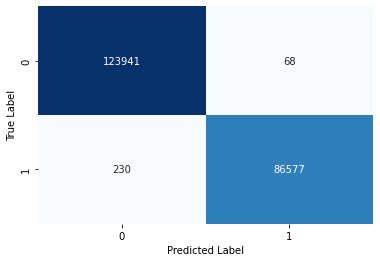


ROC AUC Score: 0.9991528211610593


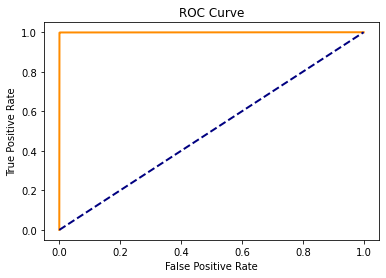


Prediction time of  Random Forest Classifier 0.1270291805267334

Model Accuracy:
 0.998586445051609

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    124009
         1.0       1.00      1.00      1.00     86807

    accuracy                           1.00    210816
   macro avg       1.00      1.00      1.00    210816
weighted avg       1.00      1.00      1.00    210816



============================== Naive Bayes Classifier Model Test Results ==============================


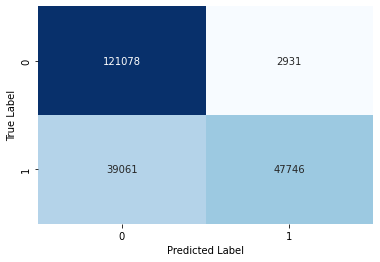


ROC AUC Score: 0.906850573008344


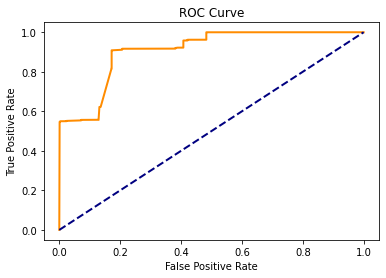


Prediction time of  Naive Bayes Classifier 0.3481118679046631

Model Accuracy:
 0.8008120825743776

Classification report:
               precision    recall  f1-score   support

         0.0       0.76      0.98      0.85    124009
         1.0       0.94      0.55      0.69     86807

    accuracy                           0.80    210816
   macro avg       0.85      0.76      0.77    210816
weighted avg       0.83      0.80      0.79    210816



============================== Decision Tree Classifier Model Test Results ==============================


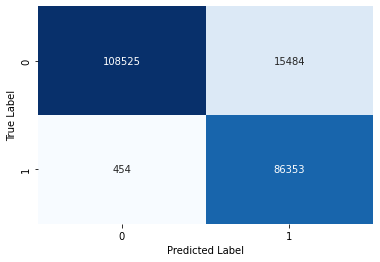


ROC AUC Score: 0.9357228386487254


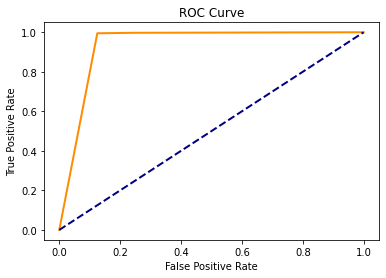


Prediction time of  Decision Tree Classifier 0.11278057098388672

Model Accuracy:
 0.9243985276259866

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      0.88      0.93    124009
         1.0       0.85      0.99      0.92     86807

    accuracy                           0.92    210816
   macro avg       0.92      0.93      0.92    210816
weighted avg       0.93      0.92      0.92    210816



============================== XG Boost Classifier Model Test Results ==============================


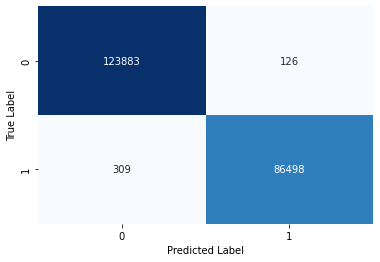


ROC AUC Score: 0.9998788581736595


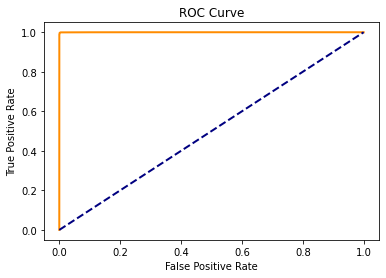


Prediction time of  XG Boost Classifier 0.1673903465270996

Model Accuracy:
 0.9979365892531876

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    124009
         1.0       1.00      1.00      1.00     86807

    accuracy                           1.00    210816
   macro avg       1.00      1.00      1.00    210816
weighted avg       1.00      1.00      1.00    210816



============================== XG Boost + Random Forest Model Test Results ==============================


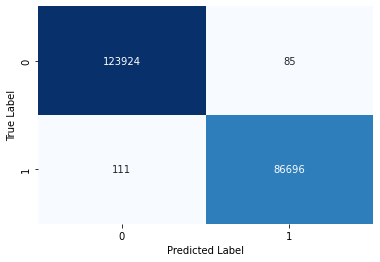


ROC AUC Score: 0.9999854810321835


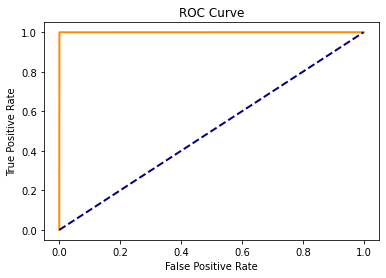


Prediction time of  XG Boost + Random Forest 0.3310666084289551

Model Accuracy:
 0.9990702792956891

Classification report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    124009
         1.0       1.00      1.00      1.00     86807

    accuracy                           1.00    210816
   macro avg       1.00      1.00      1.00    210816
weighted avg       1.00      1.00      1.00    210816




In [56]:
from sklearn.metrics import roc_curve, roc_auc_score
for i, v in models:
    t1 = time.time()
    accuracy = metrics.accuracy_score(test_y, v.predict(test_X))
    t2 = time.time()
    classification = metrics.classification_report(test_y, v.predict(test_X))
    print()
    print('============================== {} Model Test Results =============================='.format(i))
    
    # Print confusion matrix
    cm = metrics.confusion_matrix(test_y, v.predict(test_X))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()
    print()
    
    # Calculate and print ROC AUC score
    y_pred_prob = v.predict_proba(test_X)[:,1] # corrected v instead of model
    auc = roc_auc_score(test_y, y_pred_prob)
    print("ROC AUC Score:", auc)
    
    # Plot ROC Curve
    fpr, tpr, thresholds = roc_curve(test_y, y_pred_prob)
    plt.plot(fpr, tpr, color="darkorange", lw=2)
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.show()
    print()
    
    print("Prediction time of ", i, t2-t1)
    print()
    print("Model Accuracy:\n", accuracy)
    print()
    print("Classification report:\n", classification) 
    print()
